# NYC Taxi Duration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [2]:
FILEPATH = os.path.join('data-nyc-taxi-trip-duration', 'sample_submission.csv')
train = pd.read_csv('data-nyc-taxi-trip-duration/train.csv')
test = pd.read_csv('data-nyc-taxi-trip-duration/test.csv')

In [3]:
train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [4]:
train.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,N,237
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,-73.863815,40.769684,-73.864395,40.761326,N,800
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Show the columns in the dataset

In [6]:
for x in train.keys():
    print(x)

id
vendor_id
pickup_datetime
dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag
trip_duration


In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Data Exploration

In a business point of view, we can firstly said :
- the driver who extends the trip to earn more money (however, there is no dollz column so no)
- the geographical position of the people between the beginning and the end of the race
- the time at which people took the taxi (e.g. during traffic jams or not; during the day or not etc.)


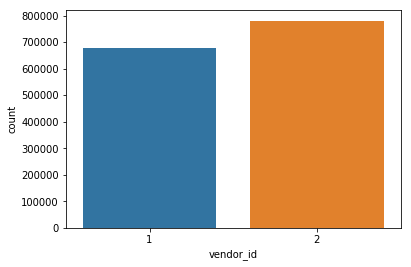

In [9]:
sns.countplot(x='vendor_id', data= train);
plt.show()

We are gonna change the values for pickup and dropoff to do some vizulisation

In [10]:
from datetime import datetime

train['pickup_datetime'] = train['pickup_datetime'].astype('datetime64[ns]')
train['dropoff_datetime'] = train['dropoff_datetime'].astype('datetime64[ns]')

In [11]:
pick_features = ['pickup_datetime', 'dropoff_datetime', 'vendor_id']
pick_df = train[pick_features].copy(True)
pick_df.head()

,pickup_datetime,dropoff_datetime,vendor_id
0,2016-03-14 17:24:55,2016-03-14 17:32:30,2
1,2016-06-12 00:43:35,2016-06-12 00:54:38,1
2,2016-01-19 11:35:24,2016-01-19 12:10:48,2
3,2016-04-06 19:32:31,2016-04-06 19:39:40,2
4,2016-03-26 13:30:55,2016-03-26 13:38:10,2


In [12]:
# Pull out the month, the week, the day of week and hour of day and make a new feature for each

pick_df['week'] = pick_df.loc[:,'pickup_datetime'].dt.week;
pick_df['weekday'] = pick_df.loc[:,'pickup_datetime'].dt.weekday;
pick_df['hour'] = pick_df.loc[:,'pickup_datetime'].dt.hour;
pick_df['month'] = pick_df.loc[:,'pickup_datetime'].dt.month;

# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(pick_df['month']).sort_index()
hour_usage = pd.value_counts(pick_df['hour']).sort_index()

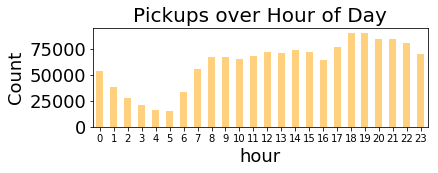

In [13]:
figure = plt.subplot(2, 1, 2)
hour_usage.plot.bar(alpha = 0.5, color = 'orange')
plt.title('Pickups over Hour of Day', fontsize = 20)
plt.xlabel('hour', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)
plt.show()

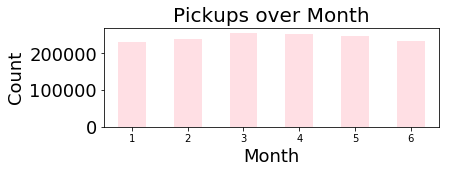

In [14]:
figure = plt.subplot(2, 1, 2)
month_usage.plot.bar(alpha = 0.5, color = 'pink')
plt.title('Pickups over Month', fontsize = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)
plt.show()

The pick hours of taxi trip are between 5 PM to 8 PM.
During the night (from 12 AM to 7 AM) there is less taxi trip
In terms of months, there are approximately as many users from January to June

In [15]:
train.passenger_count.min()

0

In [16]:
train.passenger_count.max()

9

There is 0 to 9 passengers by taxi trip. We will later drop the taxi trip with 0 passengers (because there must be atleast 1 passenger) 

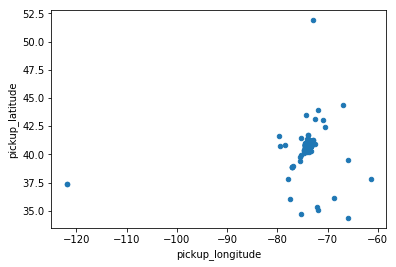

In [17]:
train.plot.scatter(x='pickup_longitude',y='pickup_latitude')
plt.show()

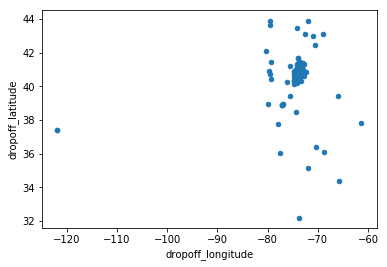

In [18]:
train.plot.scatter(x='dropoff_longitude',y='dropoff_latitude')
plt.show()

In [19]:
train.trip_duration.min()

1

In [20]:
train.trip_duration.max()

3526282

The trip duration's range is between 1 sec to 3526282 sec
We will later adjust this range

## Data preprocessing

### Outliers

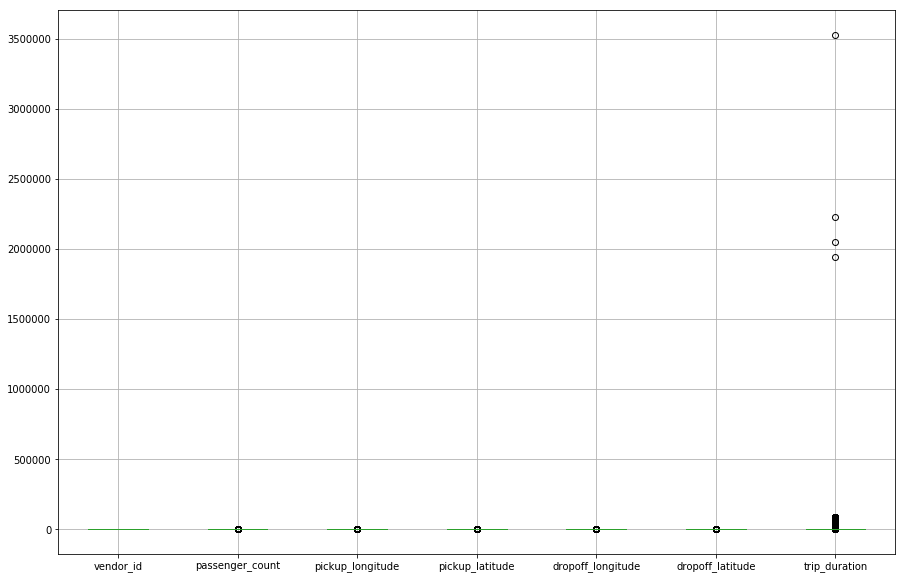

In [21]:
train.boxplot(figsize=(15,10))
plt.show()

In [22]:
# As said before, there is no need to have the min (0 passenger), we will drop it
train = train[train['passenger_count']>= 1]

In [23]:
# The trip duration's range is between 1 sec to 3526282 sec
# We will drop values that are inferior to 1 min (60 sec) and superior to 166 min (10 000 sec).
train = train[train['trip_duration']>= 1 ]
train = train[train['trip_duration']<= 10000 ]

In [24]:
# We will drop the longitude and latitude (in pickup and dropoff that looks like outliers)
train = train.loc[train['pickup_longitude']> -90]
train = train.loc[train['pickup_latitude']< 47.5]

train = train.loc[train['dropoff_longitude']> -90]
train = train.loc[train['dropoff_latitude']> 34]

## Features engineering

In [25]:
col_diff = list(set(train.columns).difference(set(test.columns)))
col_diff

['trip_duration', 'dropoff_datetime']

In [26]:
# To use the pickup and dropoff location, we will calculate the distance between them
train['dist'] = abs((train['pickup_latitude']-train['dropoff_latitude'])
                        + (train['pickup_longitude']-train['dropoff_longitude']))
test['dist'] = abs((test['pickup_latitude']-test['dropoff_latitude'])
                        + (test['pickup_longitude']-test['dropoff_longitude']))

In [27]:
# y_train
y = train["trip_duration"]  # target
# X_train 
X = train[["passenger_count","vendor_id", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "dist" ]]

## Model Selection

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
randf = RandomForestRegressor()

In [30]:
randf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
shuffle = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

In [37]:
cv_score = cross_val_score(randf, X, y, cv=shuffle, scoring='neg_mean_squared_log_error')
for i in range(len(cv_score)):
    cv_score[i] = np.sqrt(abs(cv_score[i]))
print(np.mean(cv_score))

0.4508320234310908


## Prediction

In [38]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,0.022606
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,0.020195
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,0.003216
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,0.071789
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.003120


In [40]:
X_test = test[["vendor_id", "passenger_count","pickup_longitude", "pickup_latitude","dropoff_longitude","dropoff_latitude","dist"]]
prediction = randf.predict(X_test)
prediction

array([ 805.3,  580.3,  589.4, ..., 1795.3, 1973.5, 1515.6])

In [41]:
my_submission = pd.DataFrame({'id': test.id, 'trip_duration': prediction})
my_submission.head()

,id,trip_duration
0,id3004672,805.3
1,id3505355,580.3
2,id1217141,589.4
3,id2150126,866.8
4,id1598245,355.6
